#### Helper Functions

In [83]:
# Plot colors
lblue="#a6cee3"
blue = "#1f78b4"
lgreen = "#b2df8a"
green = "#33a02c"
black= "#424242"


from os import path, remove
import csv
import subprocess
from pandas import read_csv
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import MaxNLocator

def get_results(tsvname):
    times=[]
    with open("experiments_results/"+tsvname+".results", newline='') as csvfile:
        csvreader = csv.reader(csvfile, delimiter='\t')
        for row in csvreader:
            if len(row)>0:
                splitrow = row[0].split()
                lastval = splitrow[len(splitrow) - 1]
                if (lastval[0].isdigit()):
                    times.append(float(lastval))
    print(len(times))
    print(times)
    return times


def fullConfiguration():
    return True


#### Figure 2

[81.82277, 41.27616, 65.71212, 99.510649, 105.546933, 55.147029, 76.70059, 106.286367, 81.689698, 44.522966, 76.002802, 44.409844]


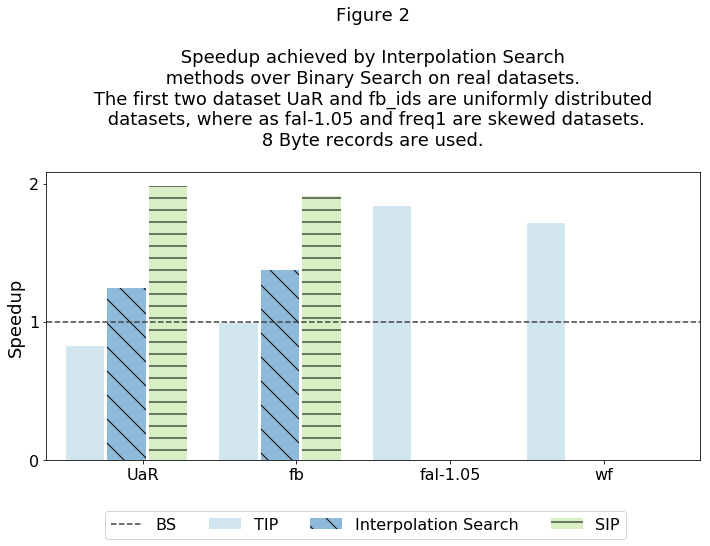

In [59]:
tsv = "fig2.tsv"

results=get_results(tsv)

uarResults=results[0:4]
fbidsResults=results[4:8]
falResults=results[8:10]
freq1Results=results[10:12]

# Calculate speedups of sip, is and tip compard to Binary Search
uarSpeedups = []
for i in range(1,len(uarResults)):
    uarSpeedups.append(uarResults[0]/uarResults[i])

fbidsSpeedups = []
for i in range(1,len(fbidsResults)):
    fbidsSpeedups.append(fbidsResults[0]/fbidsResults[i])

falSpeedups = []
for i in range(1,len(falResults)):
    falSpeedups.append(falResults[0]/falResults[i])

freq1Speedups = []
for i in range(1,len(freq1Results)):
    freq1Speedups.append(freq1Results[0]/freq1Results[i])


# Plot
# Group the speedups by algorithm
sipSpeedups=[uarSpeedups[0], fbidsSpeedups[0],0,0]
ISpeedups=[uarSpeedups[1], fbidsSpeedups[1],0,0]
tipSpeedups=[uarSpeedups[2], fbidsSpeedups[2],falSpeedups[0], freq1Speedups[0]]

labels=["UaR", "fb", "fal-1.05", "wf"]
pos = [0,1,2,3]
width = 0.25 

caption = "Figure 2\n\n Speedup achieved by Interpolation Search \n methods over Binary Search on real datasets. \n The first two dataset UaR and fb_ids are uniformly distributed \n datasets, where as fal-1.05 and freq1 are skewed datasets.\n 8 Byte records are used. \n"

fig, ax = plt.subplots(figsize=(10,8))
plt.bar(pos, 
        tipSpeedups, 
        width, 
        alpha=0.5, 
        color=lblue, 
        label="TIP") 

plt.bar([p + width+.02 for p in pos], 
        ISSpeedups,
        width, 
        alpha=0.5, 
        color=blue, 
        label="Interpolation Search",
        hatch="\\") 

plt.bar([p + width*2+.04 for p in pos], 
        sipSpeedups,
        width, 
        alpha=0.5, 
        color=lgreen, 
        label="SIP",
        hatch="-") 

plt.plot([-1,5],[1,1],linestyle="dashed", color=black, label="BS")

ax.set_ylabel('Speedup', size=18)

ax.set_title(caption, size=18)

# Set the position of the x ticks
ax.set_xticks([p + 1.5 * width for p in pos])
ax.yaxis.set_major_locator(MaxNLocator(integer=True))

# Set the labels for the x ticks
ax.set_xticklabels(labels, size=15)
ax.tick_params(axis='both', which='major', labelsize=16)

# Setting the x-axis and y-axis limits
plt.xlim(min(pos)-width, max(pos)+width*4)
# plt.ylim([0, max(df['pre_score'] + df['mid_score'] + df['post_score'])] )

# Adding the legend and showing the plot
# plt.legend(prop={'size': 22}, ncol=3, loc='upper right', bbox_to_anchor=(0.7, -0.15))
plt.legend(['BS','TIP', 'Interpolation Search', 'SIP'], ncol=4, bbox_to_anchor=(.9, -0.15), loc='upper right',prop={'size': 16})
plt.tight_layout()
plt.gcf().savefig('./figures/fig2.pdf', format='pdf')

#### Figure 5

[53.293367, 105.470772, 106.322792, 76.463435, 68.490158, 154.172603, 126.9181, 102.798361, 132.675379, 235.64444, 214.893084, 192.957367]


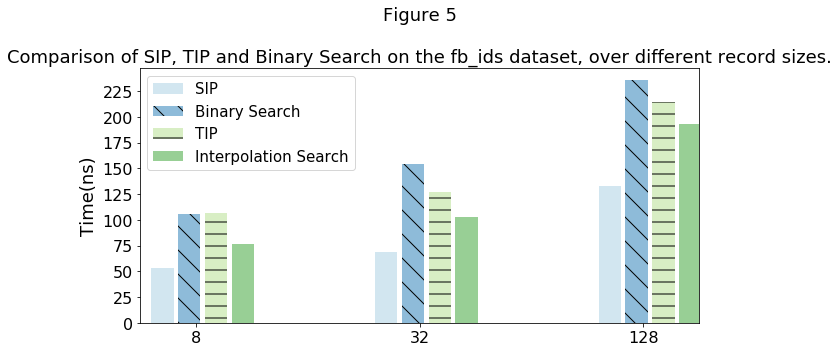

In [66]:
tsv="fig5.tsv"

results=get_results(tsv)

# Group the results by algorithm
sipResult=[results[0], results[4], results[8]]
bsResult=[results[1], results[5], results[9]]
tipResult=[results[2], results[6], results[10]]
isResult=[results[3], results[7], results[11]]

pos = [0,1,2]
width = 0.10 

fig, ax = plt.subplots(figsize=(11,5))
plt.bar(pos, 
        sipResult, 
        width, 
        alpha=0.5, 
        color=lblue, 
        label="SIP") 

plt.bar([p + (width+.02)*1 for p in pos], 
        bsResult,
        width, 
        alpha=0.5, 
        color=blue, 
        label="Binary Search",
        hatch="\\") 

plt.bar([p + (width+.02)*2 for p in pos], 
        tipResult,
        width, 
        alpha=0.5, 
        color=lgreen, 
        label="TIP",
        hatch="-")

plt.bar([p + (width+.02)*3 for p in pos], 
        isResult,
        width, 
        alpha=0.5, 
        color=green, 
        label="Interpolation Search") 

ax.set_ylabel('Time(ns)', size=18)

ax.set_title('Figure 5', size=22)

# Set the position of the x ticks
ax.set_xticks([p + 1.5 * width for p in pos])
ax.yaxis.set_major_locator(MaxNLocator(integer=True))

# Set the labels for the x ticks
ax.set_xticklabels(["8","32","128"], size=15)
ax.tick_params(axis='both', which='major', labelsize=16)

# Setting the x-axis and y-axis limits
plt.xlim(min(pos)-width, max(pos)+width*4)
# plt.ylim([0, max(df['pre_score'] + df['mid_score'] + df['post_score'])] )

# Adding the legend and showing the plot
caption = "Figure 5\n\nComparison of SIP, TIP and Binary Search on the fb_ids dataset, over different record sizes."
plt.title(caption, size=18)
plt.tight_layout()
plt.legend(['SIP', 'Binary Search', 'TIP', 'Interpolation Search' ], loc='upper right')
plt.legend(prop={'size': 15})


plt.gcf().savefig('./figures/fig5.pdf', format='pdf')

#### Figure 6

[12.500137, 15.73613, 16.945272, 46.299553, 60.645068, 84.653023, 82.191614, 118.73222, 153.230935, 152.15325, 256.112128, 445.917216, 366.808559, 604.57643, 876.043262, 5.836609, 7.069598, 8.239571, 27.267146, 36.29704, 51.257528, 41.274147, 52.52883, 66.421322, 58.971937, 108.785458, 204.038548, 152.143772, 199.563174, 276.218142]


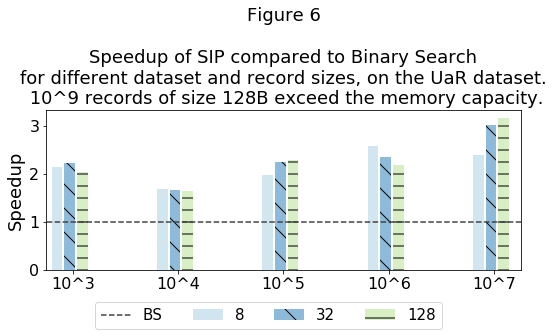

In [76]:
tsv="fig6.tsv"

results=get_results(tsv)

datasetSizes=[3,4,5,6,7]
if len(results) > 30:
    datasetSizes=[3,4,5,6,7,8,9]

# Group the results by algorithm
bsResults=results[0:(len(results)//2)]
sipResults=results[(len(results)//2):len(results)]

# Calculate speedup
sipSpeedup=[(bsResults[i]/sipResults[i]) for i in range(len(bsResults))]

# Plot
# Group the speedups by RecordSize
groupedByRecordSize = [[],[],[]]
for i in range(len(datasetSizes)):
    groupedByRecordSize[0].append(sipSpeedup[3*i])
    groupedByRecordSize[1].append(sipSpeedup[3*i+1])
    groupedByRecordSize[2].append(sipSpeedup[3*i+2])

pos = [i for i in range(len(datasetSizes))]
width = 0.1

fig, ax = plt.subplots(figsize=(8,5))


plt.bar(pos, 
        groupedByRecordSize[0], 
        width, 
        alpha=0.5, 
        color=lblue, 
        label="8") 

plt.bar([p + (width+.02)*1 for p in pos], 
        groupedByRecordSize[1],
        width, 
        alpha=0.5, 
        color=blue, 
        label="32",
        hatch="\\") 

plt.bar([p + (width+.02)*2 for p in pos], 
        groupedByRecordSize[2],
        width, 
        alpha=0.5, 
        color=lgreen, 
        label="128",
        hatch="-")

plt.plot([-1,len(datasetSizes)],[1,1],linestyle="dashed", color=black, label="BS")

ax.set_ylabel('Speedup', size=18)

ax.set_title('Figure 6', size=22)

# Set the position of the x ticks
ax.set_xticks([p + 1.5 * width for p in pos])
ax.yaxis.set_major_locator(MaxNLocator(integer=True))

# Set the labels for the x ticks
xticks=["10^"+str(i) for i in datasetSizes]
ax.set_xticklabels(xticks, size=15)
ax.tick_params(axis='both', which='major', labelsize=16)

# Setting the x-axis and y-axis limits
plt.xlim(min(pos)-width, max(pos)+width*4)
# plt.ylim([0, max(df['pre_score'] + df['mid_score'] + df['post_score'])] )

# Adding the legend and showing the plot
plt.legend(prop={'size': 15}, ncol=4, loc='upper right', bbox_to_anchor=(0.85, -0.15))
caption = "Figure 6\n\nSpeedup of SIP compared to Binary Search\nfor different dataset and record sizes, on the UaR dataset.\n 10^9 records of size 128B exceed the memory capacity."
plt.title(caption, size=18)
plt.tight_layout()
plt.gcf().savefig('./figures/fig6.pdf', format='pdf')

#### Figure 7

[15.663686, 59.696463, 118.908572, 256.693964, 605.639566, 6.91527, 36.398914, 52.536155, 108.971131, 199.245408]


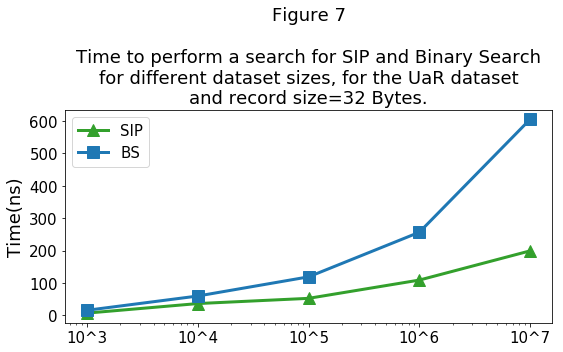

In [80]:
tsv="fig7.tsv"

results=get_results(tsv)

datasetSizes=[3,4,5,6,7]
if len(datasetSizes) > 10:
    datasetSizes=[3,4,5,6,7,8,9]

# Group the results by algorithm
bsResults=results[0:(len(results)//2)]
sipResults=results[(len(results)//2):len(results)]

fig, ax = plt.subplots(figsize=(8,5))

plt.plot([10**i for i in datasetSizes], sipResults, color=green,marker="^", markersize=12, linewidth=3, label="SIP")
plt.plot([10**i for i in datasetSizes], bsResults, color=blue,marker="s", markersize=12, linewidth=3, label="BS")

ax.set_ylabel('Time(ns)', size=18)
ax.set_title('Figure 7', size=22)
ax.set_xscale('log')

# Set the position of the x ticks
ax.set_xticks([10**i for i in datasetSizes] )
ax.set_xticklabels(["10^"+str(i) for i in datasetSizes], size=15)
ax.tick_params(axis="y", labelsize=15)

# Adding the legend and showing the plot
plt.legend(prop={'size': 15}, loc='upper left')
caption = "Figure 7\n\nTime to perform a search for SIP and Binary Search\nfor different dataset sizes, for the UaR dataset\nand record size=32 Bytes."
plt.title(caption, size=18)
plt.tight_layout()
plt.gcf().savefig('./figures/fig7.pdf', format='pdf')

#### Figure 8

[3.867567, 35.924825, 50.814677, 143.579969, 2.923653, 30.724563, 41.209318, 96.834217, 2.774639, 21.828307, 27.74053, 71.833737, 100.181641, 6.771129, 19.09138, 41.947477, 3.689163, 32.095452, 48.911672, 118.183959, 3.321757, 25.877146, 33.659872, 73.018729, 3.235717, 11.901733, 20.20447, 53.22893, 103.29903, 7.943773, 15.17804, 37.065564]
[4.532733, 45.701548, 108.007478, 185.705152, 3.357923, 37.750986, 81.237687, 133.848535, 3.254156, 26.657618, 60.137262, 97.467606, 102.499191, 7.998175, 37.690728, 59.204029, 4.157738, 39.051449, 88.288807, 187.221058, 3.634199, 30.026121, 60.614314, 101.500433, 3.662047, 12.86782, 38.704637, 67.061996, 105.681028, 10.073083, 30.974278, 45.852018]
[5.21663, 55.409435, 219.760672, 257.492345, 4.036969, 46.656775, 154.644308, 206.822414, 3.999744, 34.942548, 110.349032, 134.638122, 329.2742, 20.078783, 92.039659, 147.237733, 5.185531, 49.190201, 195.388742, 290.88971, 4.542503, 37.981643, 111.040352, 151.882242, 4.569436, 15.548213, 58.728138, 82.34

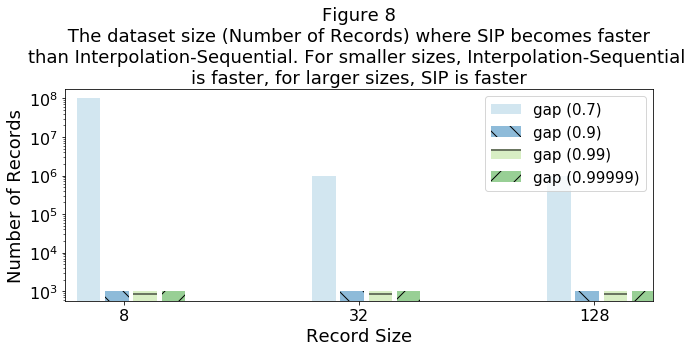

In [81]:
tsv8="fig8_8.tsv"
tsv32="fig8_32.tsv"
tsv128="fig8_128.tsv"

datasetSizes=[3,5,6,7]

results8=get_results(tsv8)
results32=get_results(tsv32)
results128=get_results(tsv128)

shape1=[len(datasetSizes)+1 for i in range(0,3)]
shape2=[len(datasetSizes)+1 for i in range(0,3)]
shape3=[len(datasetSizes)+1 for i in range(0,3)]
shape4=[len(datasetSizes)+1 for i in range(0,3)]

def analyzeResults(results, shape1, shape2, shape3, shape4, rc):
    sipResults=results[0:(len(results)//2)]
    isseqResults=results[(len(results)//2):len(results8)]

    sipResultsShape1=sipResults[0:len(datasetSizes)]
    sipResultsShape2=sipResults[len(datasetSizes):2*len(datasetSizes)]
    sipResultsShape3=sipResults[2*len(datasetSizes):3*len(datasetSizes)]
    sipResultsShape4=sipResults[3*len(datasetSizes):4*len(datasetSizes)]

    isseqResultsShape1=isseqResults[0:len(datasetSizes)]
    isseqResultsShape2=isseqResults[len(datasetSizes):2*len(datasetSizes)]
    isseqResultsShape3=isseqResults[2*len(datasetSizes):3*len(datasetSizes)]
    isseqResultsShape4=isseqResults[3*len(datasetSizes):4*len(datasetSizes)]

    for i in range(0,len(datasetSizes)):
        if sipResultsShape1[i] < isseqResultsShape1[i]:
            shape1[rc]=(i)
            break
    for i in range(0,len(datasetSizes)):
        if sipResultsShape2[i] < isseqResultsShape2[i]:
            shape2[rc]=(i)
            break
    for i in range(0,len(datasetSizes)):
        if sipResultsShape3[i] < isseqResultsShape3[i]:
            shape3[rc]=(i)
            break
    for i in range(0,len(datasetSizes)):
        if sipResultsShape4[i] < isseqResultsShape4[i]:
            shape4[rc]=(i)
            break

analyzeResults(results8, shape1, shape2, shape3, shape4,0)
analyzeResults(results32, shape1, shape2, shape3, shape4,1)
analyzeResults(results128, shape1, shape2, shape3, shape4,2)

shape1=[10**(3+i) for i in shape1]
shape2=[10**(3+i) for i in shape2]
shape3=[10**(3+i) for i in shape3]
shape4=[10**(3+i) for i in shape4]

pos = [0,1,2]
fig, ax = plt.subplots(figsize=(10,5))
plt.bar(pos, 
        shape1, 
        width, 
        alpha=0.5, 
        color=lblue, 
        label="gap (0.7)") 

plt.bar([p + width+.02 for p in pos], 
        shape2,
        width, 
        alpha=0.5, 
        color=blue, 
        label="gap (0.9)",
        hatch="\\") 

plt.bar([p + width*2+.04 for p in pos], 
        shape3,
        width, 
        alpha=0.5, 
        color=lgreen, 
        label="gap (0.99)",
        hatch="-") 

plt.bar([p + width*3+.06 for p in pos], 
        shape4,
        width, 
        alpha=0.5, 
        color=green, 
        label="gap (0.99999)",
        hatch="/") 


ax.set_ylabel('Number of Records', size=18)
ax.set_xlabel('Record Size', size=18)
ax.set_yscale('log')
caption = "Figure 8\n The dataset size (Number of Records) where SIP becomes faster \nthan Interpolation-Sequential. For smaller sizes, Interpolation-Sequential \nis faster, for larger sizes, SIP is faster"
ax.set_title(caption, size=18)

# Set the position of the x ticks
ax.set_xticks([p + 1.5 * width for p in pos])
labels=["8","32","128"]
# Set the labels for the x ticks
ax.set_xticklabels(labels, size=15)
ax.tick_params(axis='both', which='major', labelsize=16)

# Setting the x-axis and y-axis limits
plt.xlim(min(pos)-width, max(pos)+width*4)
# plt.ylim([0, max(df['pre_score'] + df['mid_score'] + df['post_score'])] )

# Adding the legend and showing the plot
plt.legend(['gap (0.7)', 'gap (0.9)', 'gap (0.99)', 'gap (0.99999)'], loc='upper right')
plt.legend(prop={'size': 15})
plt.tight_layout()
plt.gcf().savefig('./figures/fig8.pdf', format='pdf')

#### Figure 9

80
[12.487179, 12.291391, 12.291994, 12.227102, 43.295119, 43.271427, 46.826413, 43.332826, 81.969071, 82.128202, 81.888889, 81.682751, 152.342174, 152.615616, 154.250328, 152.154604, 369.268147, 366.17138, 369.015789, 364.590906, 18.535401, 17.36396, 18.108506, 19.597136, 49.424817, 22.855158, 36.391836, 42.429244, 67.304415, 44.527558, 54.343376, 63.27894, 105.643569, 56.834901, 72.443993, 94.013413, 271.058056, 162.582884, 225.812222, 251.13986, 12.514768, 12.246006, 12.183345, 12.142841, 43.282774, 43.249477, 43.279259, 43.276166, 79.994569, 80.090974, 79.834078, 79.935297, 147.262848, 147.741262, 147.542706, 147.71625, 361.090071, 359.930174, 359.587991, 358.531213, 25.284722, 22.825321, 21.473861, 18.497897, 54.062291, 55.383938, 53.596654, 49.346744, 75.341864, 78.620321, 74.988169, 66.087401, 113.152916, 121.5942, 113.158152, 103.956243, 301.114523, 316.104664, 301.962398, 269.642756]


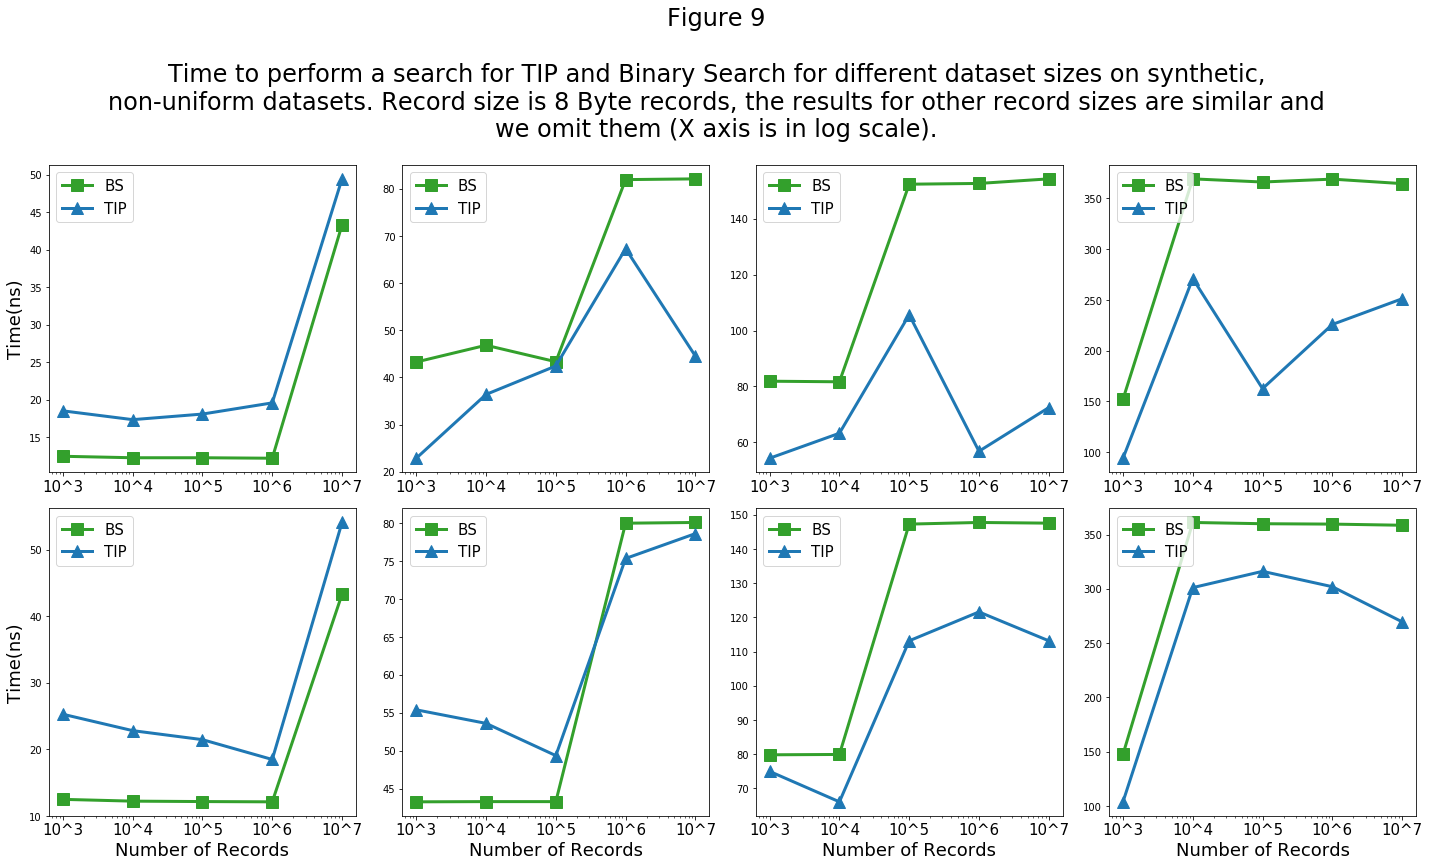

In [87]:
tsv="fig9.tsv"

results=get_results(tsv)

datasetSizes=[3,4,5,6,7]#,8,9]
if len(results) > 80:
    datasetSizes=[3,4,5,6,7,8,9]

shapes = [0.5,1.05,1.25,1.5]

# Group Results by algorithm
falResults=results[0:(len(results)//2)]
cfalResults=results[(len(results)//2):len(results)]

bsResults=falResults[0:(len(falResults)//2)]
bsResults.extend(cfalResults[0:(len(cfalResults)//2)])

tipResults=falResults[(len(falResults)//2):len(falResults)]
tipResults.extend(cfalResults[(len(cfalResults)//2):len(cfalResults)])


# Group results by plot
perPlot=[]
for i in range(0,8):
    perPlot.append([[],[]])
    for j in range(0, len(datasetSizes)):
        perPlot[i][0].append(bsResults[len(datasetSizes)*i+j])
        perPlot[i][1].append(tipResults[len(datasetSizes)*i+j])


# Plot Helpers        
xticks=["10^"+str(i) for i in datasetSizes]
datasetSizesPlot=[]
for i in datasetSizes:
    datasetSizesPlot.append(10**i)


figs, axs = plt.subplots(2,4,figsize=(20,10))
for i in range(0, len(shapes)):
    axs[0,i].plot(datasetSizesPlot, perPlot[i][0],  color=green,marker="s", markersize=12, linewidth=3, label="BS")
    axs[0,i].plot(datasetSizesPlot, perPlot[i][1],  color=blue,marker="^", markersize=12, linewidth=3, label="TIP")
    axs[0,i].set_xscale('log')
    axs[0,i].set_xticks([10**i for i in datasetSizes] )
    axs[0,i].set_xticklabels(["10^"+str(i) for i in datasetSizes], size=15)
    axs[0,i].legend(prop={'size': 15}, loc='upper left')

for i in range(0, len(shapes)):
    axs[1,i].plot(datasetSizesPlot, perPlot[len(shapes)+i][0],  color=green,marker="s", markersize=12, linewidth=3, label="BS")
    axs[1,i].plot(datasetSizesPlot, perPlot[len(shapes)+i][1],  color=blue,marker="^", markersize=12, linewidth=3, label="TIP")
    axs[1,i].set_xlabel('Number of Records', size=18)
    axs[1,i].set_xscale('log')
    axs[1,i].set_xticks([10**i for i in datasetSizes] )
    axs[1,i].set_xticklabels(["10^"+str(i) for i in datasetSizes], size=15)
    axs[1,i].legend(prop={'size': 15}, loc='upper left')

axs[0,0].set_ylabel('Time(ns)', size=18)
axs[1,0].set_ylabel('Time(ns)', size=18)

caption = "Figure 9\n\nTime to perform a search for TIP and Binary Search for different dataset sizes on synthetic,\nnon-uniform datasets. Record size is 8 Byte records, the results for other record sizes are similar and\nwe omit them (X axis is in log scale)."

figs.suptitle(caption, fontsize=24, x=0.5, y=1.2)
plt.tight_layout()
plt.gcf().savefig('./figures/fig9.pdf', format='pdf', bbox_inches='tight')

#### Figure 10

2
[68.515396, 73.509052]


ValueError: x and y must have same first dimension, but have shapes (4,) and (1,)

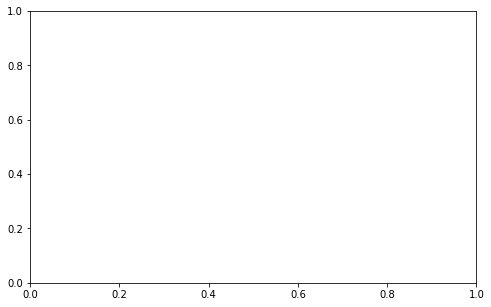

In [88]:
tsv="fig10.tsv"

datasetSizes = [3,4,5,6]

results=get_results(tsv)

# Group by algorithm
sipResults = results[0:(len(results)//2)]
isseqResults = results[(len(results)//2):len(results)]


fig, ax = plt.subplots(figsize=(8,5))

plt.plot([10**i for i in datasetSizes], sipResults, color=green,marker="^", markersize=12, linewidth=3, label="SIP")
plt.plot([10**i for i in datasetSizes], isseqResults, color=blue,marker="s", markersize=12, linewidth=3, label="Interpolation Sequential")

ax.set_ylabel('Time(ns)', size=18)
ax.set_xlabel('Number of Records', size=18)
ax.set_xscale('log')
ax.set_yscale('log')

# Set the position of the x ticks
ax.set_xticks([10**i for i in datasetSizes] )
ax.set_xticklabels(["10^"+str(i) for i in datasetSizes], size=15)
ax.tick_params(axis='y', labelsize=15)

# Adding the legend and showing the plot
plt.legend(prop={'size': 15}, loc='lower right')
caption = "Figure 10\n\nSIP compared to Interpolation-sequential \nfor various sizes of the fb_ids dataset."
fig.suptitle(caption, fontsize=24, x=0.5, y=1.3)
plt.tight_layout()
plt.gcf().savefig('./figures/fig10.pdf', format='pdf',bbox_inches='tight')

#### Figure 11

In [ ]:
tsv="fig11.tsv"

results=get_results(tsv)

freq1Res = results[0:(len(results)//2)]
freq2Res = results[(len(results)//2):len(results)]

freq1ResultsTIP = freq1Res[0:(len(freq1Res)//2)]
freq1ResultsBS = freq1Res[(len(freq1Res)//2):len(freq1Res)]
freq2ResultsTIP = freq2Res[0:(len(freq2Res)//2)]
freq2ResultsBS = freq2Res[(len(freq2Res)//2):len(freq2Res)]

figs, axs = plt.subplots(1,2,figsize=(20,10))
axs[0].plot([0,1,2], freq1ResultsBS,  color=blue,marker="s", markersize=12, linewidth=3, label="BS")
axs[0].plot([0,1,2], freq1ResultsTIP,  color=green,marker="^", markersize=12, linewidth=3, label="TIP")

axs[1].plot([0,1,2], freq1ResultsBS,  color=blue,marker="s", markersize=12, linewidth=3, label="BS")
axs[1].plot([0,1,2], freq1ResultsTIP,  color=green,marker="^", markersize=12, linewidth=3, label="TIP")

for i in range(0,2):
    axs[i].set_xticks([0,1,2])
    axs[i].set_xticklabels(["8","32","128"], size=22)
    axs[i].legend(prop={'size': 15}, loc='upper left') 
    axs[i].set_ylabel('Time(ns)', size=22)
    axs[i].set_xlabel('Record Size', size=22)
    axs[i].tick_params(axis='y', labelsize=22)

axs[0].set_title('freq1', size=22)
axs[1].set_title('freq2', size=22)

caption="Figure 11\nTIP compared to Binary Search on the freq1 (left) \nand freq2 (right) datasets for different record sizes."
figs.suptitle(caption, fontsize=24, x=0.5, y=1.05)

plt.gcf().savefig('./figures/fig11.pdf', format='pdf', bbox_inches='tight')